In [2]:
import os, sys, json, csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime

csv.field_size_limit(sys.maxsize);

# Data Exploration

Let's start by importing the data:

In [3]:
data = pd.read_csv("../data/eurlex/combined.csv", sep=",")
data = data.astype({
    'form': 'category'
})

data['date'        ] = pd.to_datetime(data['date'        ])
data['oj_date'     ] = pd.to_datetime(data['oj_date'     ])
data['of_effect'   ] = pd.to_datetime(data['of_effect'   ])
data['end_validity'] = pd.to_datetime(data['end_validity'])

## Basic statistics

In [4]:
def count_lines(r):
    ret = 0
    for row in r:
        ret += 1
    return ret

In [5]:
print(str(count_lines(json.load(open("../data/eurlex/raw.json", "r")))) + " entries -- " + str(round(os.path.getsize("../data/eurlex/raw.json")/1000/1000, 1)) + "MB")

138911 entries -- 387.8MB


In [6]:
print(str(count_lines(csv.reader(open("../data/eurlex/processed.csv", "r")))-1) + " entries -- " + str(round(os.path.getsize("../data/eurlex/processed.csv")/1000/1000, 1)) + "MB")

138911 entries -- 60.7MB


In [7]:
print(str(count_lines(csv.reader(open("../data/eurlex/texts.txt", "r")))) + " entries -- " + str(round(os.path.getsize("../data/eurlex/texts.txt")/1000/1000, 1)) + "MB")

99896 entries -- 1.2MB


In [8]:
print(str(count_lines(csv.reader(l.replace('\0', '0') for l in open("../data/eurlex/combined.csv", "r")))-1) + " entries -- " + str(round(os.path.getsize("../data/eurlex/combined.csv")/1000/1000/1000, 2)) + "GB")

99896 entries -- 3.44GB


Number of documents:

In [9]:
len(data)

99896

Number of missing elements:

In [10]:
total = data.isnull().sum()
percent = data.isnull().sum()/data.isnull().count()*100.0
missing_data = pd.concat([total, percent], axis=1, keys=['Count', 'Percent'])
missing_data

,Count,Percent
celex,0,0.000000
form,0,0.000000
date,1615,1.616681
title,0,0.000000
oj_date,1971,1.973052
of_effect,14480,14.495075
end_validity,17396,17.414111
addressee,74947,75.025026
subject_matter,15399,15.415032
directory_codes,17309,17.327020


In [11]:
print(missing_data.to_latex())

\begin{tabular}{lrr}
\toprule
{} &  Count &    Percent \\
\midrule
celex               &      0 &   0.000000 \\
form                &      0 &   0.000000 \\
date                &   1615 &   1.616681 \\
title               &      0 &   0.000000 \\
oj\_date             &   1971 &   1.973052 \\
of\_effect           &  14480 &  14.495075 \\
end\_validity        &  17396 &  17.414111 \\
addressee           &  74947 &  75.025026 \\
subject\_matter      &  15399 &  15.415032 \\
directory\_codes     &  17309 &  17.327020 \\
eurovoc\_descriptors &  20386 &  20.407224 \\
legal\_basis         &   6566 &   6.572836 \\
relationships       &    868 &   0.868904 \\
rank                &      0 &   0.000000 \\
text                &      0 &   0.000000 \\
\bottomrule
\end{tabular}



### form

In [12]:
data['form'].describe()

count          99896
unique            65
top       Regulation
freq           50076
Name: form, dtype: object

In [13]:
form_counting = data.groupby('form').size().sort_values(ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(form_counting)

form
Regulation                                   50076
Decision                                     15840
decision without addressee                   12980
decision with addressee                       4508
Directive                                     4157
Implementing regulation                       2337
Agreement                                     2091
Recommendation                                 764
Budget                                         762
Resolution                                     754
Implementing decision                          624
Opinion                                        615
Protocol                                       603
Communication                                  456
Decision - ECSC                                410
Joint Action                                   341
Notice                                         338
Common position                                283
Report                                         264
Rules of procedure        

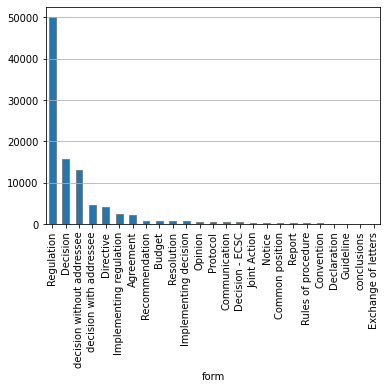

In [14]:
ax = form_counting[:][0:25].plot(kind='bar', edgecolor='grey', rot=90);
ax.yaxis.grid()

### date

In [15]:
data['date'].describe(datetime_is_numeric=True)

count                            98281
mean     1997-03-11 09:41:31.073554176
min                1949-09-24 00:00:00
25%                1988-12-21 00:00:00
50%                1999-01-05 00:00:00
75%                2005-11-11 00:00:00
max                2013-10-04 00:00:00
Name: date, dtype: object

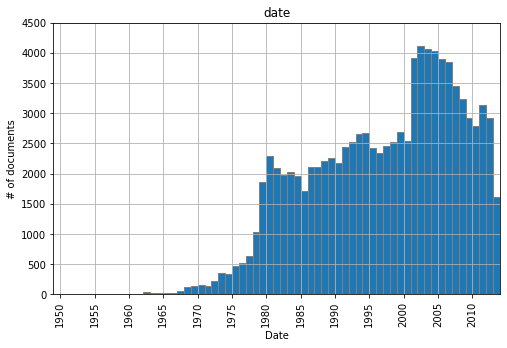

In [16]:
ax = data['date'].hist(bins=65, edgecolor='grey', range=(datetime.date(1949, 1, 1), datetime.date(2014, 1, 1)), figsize=(8,5))
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xlim([datetime.date(1949, 1, 1), datetime.date(2014, 1, 1)])
ax.set_ylim([0, 4500])
plt.title('date')
plt.xlabel('Date')
plt.ylabel('# of documents')
plt.xticks(rotation=90)
plt.yticks(range(0, 4501, 500))
plt.savefig('date-histogram.svg')

### title

In [17]:
data['title'].str.len().describe()

count    99896.000000
mean       216.306779
std         80.332225
min          6.000000
25%        161.000000
50%        206.000000
75%        255.000000
max       1531.000000
Name: title, dtype: float64

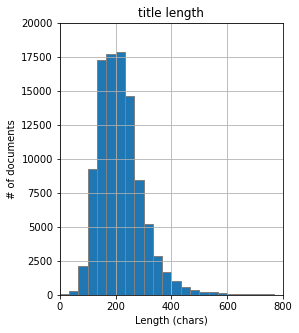

In [18]:
ax = data['title'].str.len().hist(bins=24, edgecolor='grey', range=(0, 800), figsize=(4,5))
ax.set_xlim([0, 800])
ax.set_ylim([0, 20000])
plt.title('title length')
plt.xlabel('Length (chars)')
plt.ylabel('# of documents')
plt.xticks(range(0, 801, 200))
plt.savefig('title-length-histogram.svg')

### oj_date

In [19]:
data['oj_date'].describe(datetime_is_numeric=True)

count                            97925
mean     1997-02-23 20:43:02.368138880
min                1952-12-30 00:00:00
25%                1988-12-30 00:00:00
50%                1998-12-09 00:00:00
75%                2005-10-13 00:00:00
max                2013-10-22 00:00:00
Name: oj_date, dtype: object

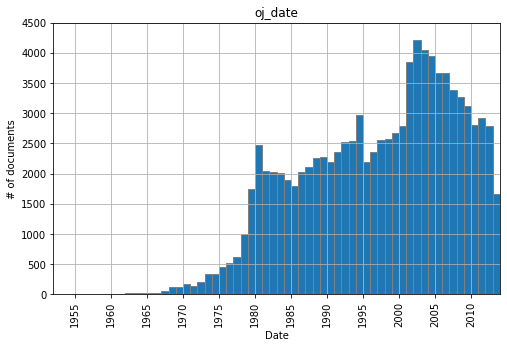

In [20]:
ax = data['oj_date'].hist(bins=62, edgecolor='grey', range=(datetime.date(1952, 1, 1), datetime.date(2014, 1, 1)), figsize=(8,5))
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xlim([datetime.date(1952, 1, 1), datetime.date(2014, 1, 1)])
ax.set_ylim([0, 4500])
plt.title('oj_date')
plt.xlabel('Date')
plt.ylabel('# of documents')
plt.xticks(rotation=90)
plt.yticks(range(0, 4501, 500))
plt.savefig('oj_date-histogram.svg')

### of_effect

In [21]:
data['of_effect'].describe(datetime_is_numeric=True)

count                            85416
mean     1997-04-29 21:12:35.605507072
min                1953-01-01 00:00:00
25%                1989-04-14 00:00:00
50%                1998-11-24 00:00:00
75%                2005-11-14 00:00:00
max                2017-01-01 00:00:00
Name: of_effect, dtype: object

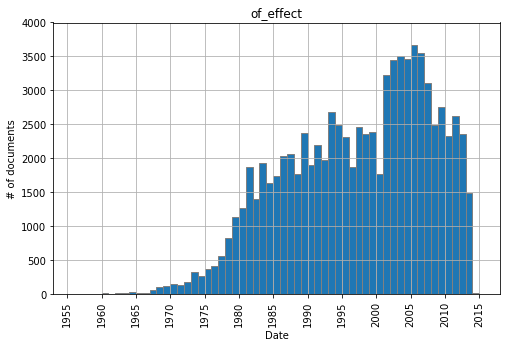

In [22]:
ax = data['of_effect'].hist(bins=65, edgecolor='grey', range=(datetime.date(1953, 1, 1), datetime.date(2018, 1, 1)), figsize=(8,5))
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xlim([datetime.date(1953, 1, 1), datetime.date(2018, 1, 1)])
ax.set_ylim([0, 4000])
plt.title('of_effect')
plt.xlabel('Date')
plt.ylabel('# of documents')
plt.xticks(rotation=90)
plt.yticks(range(0, 4001, 500))
plt.savefig('of_effect-histogram.svg')

### end_validity

In [23]:
valid_end_validity = data[data['end_validity'] != pd.to_datetime("2100-01-01")]['end_validity']
valid_end_validity.describe(datetime_is_numeric=True)

count                            47670
mean     1995-04-09 18:06:07.023284992
min                1954-01-07 00:00:00
25%                1987-05-01 00:00:00
50%                1994-08-01 00:00:00
75%                2002-03-30 18:00:00
max                2058-12-31 00:00:00
Name: end_validity, dtype: object

In [24]:
invalid_end_validity = data[data['end_validity'] == pd.to_datetime("2100-01-01")]['end_validity']
invalid_end_validity.count()

34830

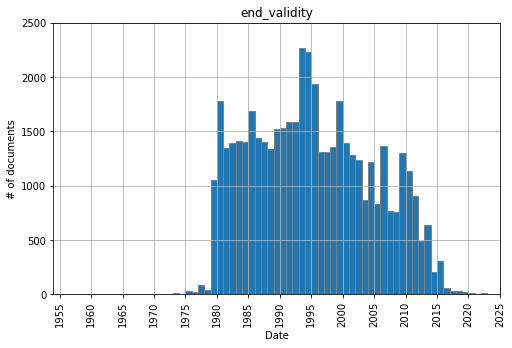

In [25]:
ax = valid_end_validity.hist(bins=104, edgecolor='grey', range=(datetime.date(1954, 1, 1), datetime.date(2058, 1, 1)), figsize=(8,5))
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xlim([datetime.date(1954, 1, 1), datetime.date(2025, 1, 1)])
ax.set_ylim([0, 2500])
plt.title('end_validity')
plt.xlabel('Date')
plt.ylabel('# of documents')
plt.xticks(rotation=90)
plt.yticks(range(0, 2501, 500))
plt.savefig('env_validity-histogram.svg')

### addressee

In [26]:
data['addressee'].describe()

count                 24949
unique                 2650
top       The Member States
freq                  11159
Name: addressee, dtype: object

In [27]:
# Group in a single list all keywords
addressees = []
NaN_counter = 0
for element in data['addressee']:
    if (type(element) == float):
        NaN_counter += 1
        addressees.append('NaN')
    else:
        for sub_element in element.split(";"): # keywords related to a single entry are separated by ";"
            addressees.append(sub_element)
        
print("Total addressees: {}".format(len(addressees)))
print("Total NaN values: {}".format(NaN_counter))

Total addressees: 117688
Total NaN values: 74947


In [28]:
# Get unique keywords and respective frequency
unique_addressees, addressees_count = np.unique(addressees,return_counts=True)
addressees_count_sort_ind = np.argsort(-addressees_count)

print("Unique addressees: {}".format(len(unique_addressees)))
print("(Excluding NaN) Most frequently used addressee: {} | {} times".format(unique_addressees[addressees_count_sort_ind][1], addressees_count[addressees_count_sort_ind][1]))

Unique addressees: 327
(Excluding NaN) Most frequently used addressee: The Member States | 11231 times


In [29]:
lower_bound_ = 1
upper_bound_ = 26
sub_unique_addressees = unique_addressees[addressees_count_sort_ind][lower_bound_:upper_bound_]
sub_addressees_count = addressees_count[addressees_count_sort_ind][lower_bound_:upper_bound_]

In [30]:
addressees_df = pd.DataFrame({'Addressees' : sub_unique_addressees, 'Frequency' : sub_addressees_count})
print(addressees_df)

                     Addressees  Frequency
0             The Member States      11231
1                       Private       4579
2            German nationality       2190
3           British nationality       1753
4     United States nationality       1710
5                        France       1515
6            French nationality       1476
7                         Italy       1321
8   Federal Republic of Germany       1309
9             Dutch nationality       1036
10               United Kingdom        985
11                      Belgium        797
12                  Netherlands        778
13          Italian nationality        748
14                        Spain        729
15                      Ireland        627
16                       Greece        613
17                     Portugal        593
18                            #        584
19          Spanish nationality        503
20                      Denmark        457
21          Swedish nationality        451
22         

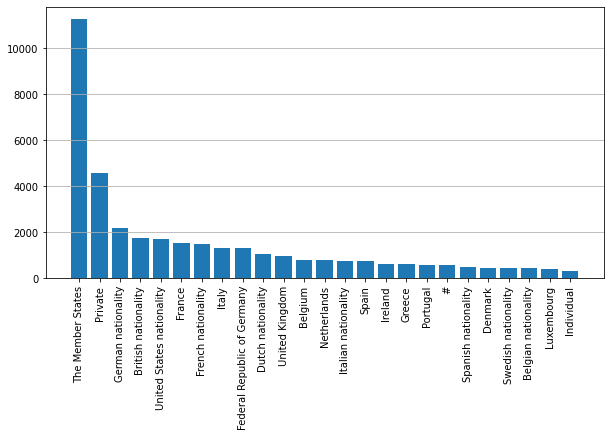

<Figure size 432x288 with 0 Axes>

In [31]:
ticks_ = range(len(sub_addressees_count))
f, ax = plt.subplots(figsize=(10,5))
plt.bar(ticks_, sub_addressees_count, align='center')
plt.xticks(ticks_, sub_unique_addressees, rotation='vertical')
plt.grid(axis='y')
plt.show()
plt.savefig('top25-addressees.svg')

## subject_matter

In [32]:
data['subject_matter'].describe()

count                                                 84497
unique                                                 5601
top       Competition;Rules applying to undertakings - c...
freq                                                   4766
Name: subject_matter, dtype: object

In [33]:
# Group in a single list all keywords
keywords = []
for element in data['subject_matter']:
    if (type(element) == float):
        keywords.append('NaN')
    else:
        for sub_element in element.split(";"): # keywords related to a single entry are separated by ";"
            keywords.append(sub_element)
        
print("Total Keywords: {}".format(len(keywords)))

Total Keywords: 187886


In [34]:
# Get unique keywords and respective frequency
unique_keywords, count = np.unique(keywords,return_counts=True)
count_sort_ind = np.argsort(-count)

print("Unique Keywords: {}".format(len(unique_keywords)))
print("(Excluding NaN) Most frequently used keyword: {} | {} times".format(unique_keywords[count_sort_ind][1], count[count_sort_ind][1]))

Unique Keywords: 249
(Excluding NaN) Most frequently used keyword: common commercial policy | 11961 times


In [35]:
lower_bound = 1 # starting at 1 to skip NaN (because NaN is the most common)
upper_bound = 26

In [36]:
sub_unique_keywords = unique_keywords[count_sort_ind][lower_bound:upper_bound]

In [37]:
sub_count = count[count_sort_ind][lower_bound:upper_bound]

In [38]:
subject_matter_df = pd.DataFrame({'Keywords' : sub_unique_keywords, 'Frequency' : sub_count})
print(subject_matter_df)

                                             Keywords  Frequency
0                            common commercial policy      11961
1                                  External relations      10477
2                                         Agriculture       8943
3                                         Competition       6749
4                              Veterinary legislation       5653
5                                    Fisheries policy       5395
6     Rules applying to undertakings - concentrations       4786
7                               Approximation of laws       4727
8                                     Internal market       3829
9                                    CCT: derogations       3526
10                                        Association       3370
11              Provisions governing the Institutions       3112
12                                      Milk products       2960
13  European Agricultural Guidance and Guarantee F...       2951
14                       

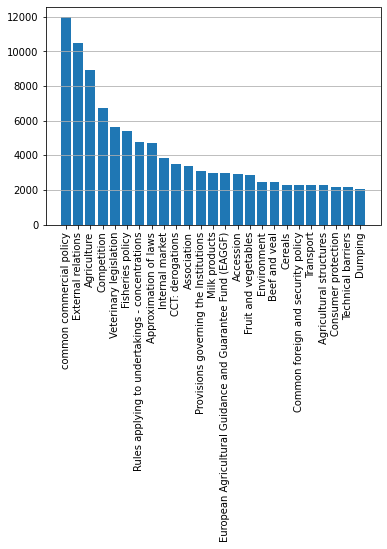

In [39]:
ticks = range(len(sub_count))
plt.bar(ticks, sub_count, align='center')
plt.xticks(ticks, sub_unique_keywords, rotation='vertical')
plt.grid(axis='y')
plt.show()

### eurovoc_descriptors

In [40]:
data['eurovoc_descriptors'].describe()

count                                                 79510
unique                                                52291
top       agri-monetary policy;citrus fruit;fruit vegeta...
freq                                                    460
Name: eurovoc_descriptors, dtype: object

In [41]:
# Group in a single list all keywords
eurovoc_descriptors = []
NaN_counter = 0
for element in data['eurovoc_descriptors']:
    if (type(element) == float):
        NaN_counter += 1
        eurovoc_descriptors.append('NaN')
    else:
        for sub_element in element.split(";"): # keywords related to a single entry are separated by ";"
            eurovoc_descriptors.append(sub_element)
        
print("Total eurovoc descriptors: {}".format(len(eurovoc_descriptors)))
print("Total NaN values: {}".format(NaN_counter))

Total eurovoc descriptors: 445397
Total NaN values: 20386


In [42]:
# Get unique keywords and respective frequency
unique_eurovoc_descriptors, eurovoc_descriptors_count = np.unique(eurovoc_descriptors,return_counts=True)
eurovoc_descriptors_count_sort_ind = np.argsort(-eurovoc_descriptors_count)

print("Unique eurovoc descriptors: {}".format(len(unique_eurovoc_descriptors)))
print("(Excluding NaN) Most frequently used eurovoc descriptor: {} | {} times".format(unique_eurovoc_descriptors[eurovoc_descriptors_count_sort_ind][1], eurovoc_descriptors_count[eurovoc_descriptors_count_sort_ind][1]))

Unique eurovoc descriptors: 5204
(Excluding NaN) Most frequently used eurovoc descriptor: import | 5871 times


In [43]:
lower_bound_ = 1
upper_bound_ = 26
sub_unique_eurovoc_descriptors = unique_eurovoc_descriptors[eurovoc_descriptors_count_sort_ind][lower_bound_:upper_bound_]
sub_eurovoc_descriptors_count = eurovoc_descriptors_count[eurovoc_descriptors_count_sort_ind][lower_bound_:upper_bound_]

In [44]:
eurovoc_descriptors_df = pd.DataFrame({'Eurovoc Descriptors' : sub_unique_eurovoc_descriptors, 'Frequency' : sub_eurovoc_descriptors_count})
print(eurovoc_descriptors_df)

               Eurovoc Descriptors  Frequency
0                           import       5871
1                    export refund       4785
2              originating product       3837
3                award of contract       3794
4                     citrus fruit       3401
5                        pip fruit       3388
6                  fruit vegetable       3386
7                     tariff quota       3360
8                     import price       3352
9                    third country       3319
10                  import licence       3006
11                    EC agreement       2914
12                  health control       2576
13                      CCT duties       2259
14                           Spain       2022
15                       State aid       1917
16           veterinary inspection       1870
17                 EU Member State       1847
18                       marketing       1837
19  common organisation of markets       1814
20            agri-monetary policy

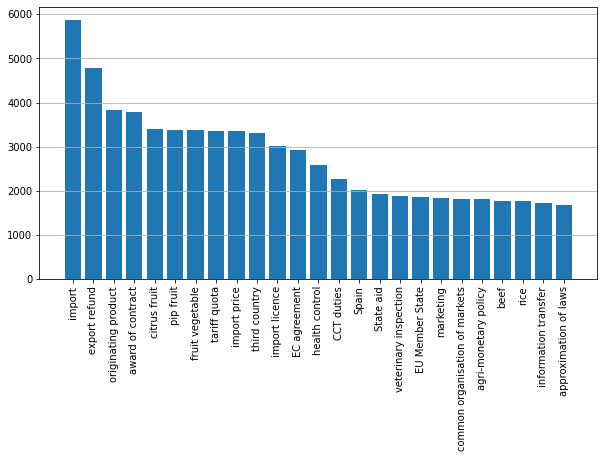

<Figure size 432x288 with 0 Axes>

In [45]:
ticks_ = range(len(sub_eurovoc_descriptors_count))
f, ax = plt.subplots(figsize=(10,5))
plt.bar(ticks_, sub_eurovoc_descriptors_count, align='center')
plt.xticks(ticks, sub_unique_eurovoc_descriptors, rotation='vertical')
plt.grid(axis='y')
plt.show()
plt.savefig('top25-eurovoc-descriptors.svg')

## relationships

In [46]:
# Group in a single list all relationships
relationships = []

for element in data['relationships']:
    if (type(element) == float):
        continue
    else:
        for sub_element in element.split(";"): # relationships are separated by ";"
            relationships.append(sub_element)
        
print("Total relationships: {}".format(len(relationships)))
print("Relationships per document: {}".format(len(relationships)/len(data)))

Total relationships: 463748
Relationships per document: 4.642308000320333


In [47]:
# Get unique keywords and respective frequency
unique_relationships, relationships_count = np.unique(relationships,return_counts=True)
relationships_count_sort_ind = np.argsort(-relationships_count)

print("Unique relationships: {}".format(len(unique_relationships)))
print("Most frequently used relationships: {} | {} times".format(unique_relationships[relationships_count_sort_ind][0], relationships_count[relationships_count_sort_ind][0]))

Unique relationships: 118028
Most frequently used relationships: 21994A0103(01) | 3937 times


In [48]:
sub_unique_relationships = unique_relationships[relationships_count_sort_ind][0:25]
sub_relationships_count = relationships_count[relationships_count_sort_ind][0:25]

In [49]:
relationships_df = pd.DataFrame({'Relationships' : sub_unique_relationships, 'Frequency' : sub_relationships_count})
print(relationships_df)

     Relationships  Frequency
0   21994A0103(01)       3937
1        11957E113       3186
2       32007R1234       3089
3       31989R4064       2484
4       32004R0139       2392
5        11957E043       2075
6       31968R0804       1870
7       31992R1766       1764
8       31994R3223       1662
9       31999R1255       1426
10      31968R0805       1401
11      32001R1260       1249
12      31992R2913       1233
13      32003R1784       1187
14  21994A0103(52)       1153
15      31972R1035       1144
16      31993R2454       1133
17      31966R0136       1127
18      31993R2847       1097
19      31975R2727       1086
20      31987R2658       1068
21      31995R3072        950
22  21994A0103(51)        932
23       11992E113        932
24      32002R1605        930


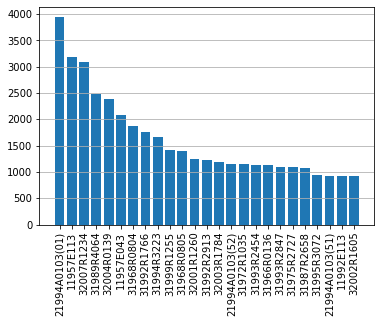

In [50]:
ticks_ = range(len(sub_relationships_count))
plt.bar(ticks_, sub_relationships_count, align='center')
plt.xticks(ticks, sub_unique_relationships, rotation='vertical')
plt.grid(axis='y')
plt.show()

## text

In [51]:
data['text'].str.len().describe().apply(lambda x: format(x, 'f'))

count       99896.000000
mean        32916.625521
std        268825.813584
min          1604.000000
25%          4819.000000
50%          7489.000000
75%         16978.000000
max      18605992.000000
Name: text, dtype: object

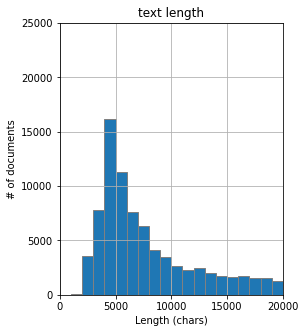

In [52]:
ax = data['text'].str.len().hist(bins=20, edgecolor='grey', range=(0, 20000), figsize=(4,5))
ax.set_xlim([0, 20000])
ax.set_ylim([0, 25000])
plt.title('text length')
plt.xlabel('Length (chars)')
plt.ylabel('# of documents')
plt.xticks(range(0, 20001, 5000))
plt.savefig('text-length-histogram.svg')

## rank

In [53]:
data['rank'].describe().apply(lambda s: f'{s:.8f}')

count    99896.00000000
mean         0.00001001
std          0.00006858
min          0.00000154
25%          0.00000456
50%          0.00000571
75%          0.00000815
max          0.01082200
Name: rank, dtype: object

In [54]:
pd.options.display.width = 1000
print(data.sort_values(by="rank", ascending=False)[0:20][["celex", "rank", "title"]].to_string())

                celex      rank                                                                                                                                                                                                                                                                                                            title
70099      32004R0139  0.010822                                                                                                                                                Council Regulation (EC) No 139/2004 of 20 January 2004 on the control of concentrations between undertakings (the EC Merger Regulation) (Text with EEA relevance)
32162      31989R4064  0.009498                                                                                                                                   Council Regulation (EEC) No 4064/89 of 21 December 1989 on the control of concentrations between undertakings    /* CORRIGENDA - WHOLE TEXT REPUBLISHED IN OJ L 257/

In [55]:
data['rank_log'] = np.log10(data['rank'])/0.4342944819

In [56]:
data['rank_log'].describe()

count    99896.000000
mean       -11.972816
std          0.654713
min        -13.381513
25%        -12.298323
50%        -12.073859
75%        -11.716888
max         -4.526174
Name: rank_log, dtype: float64

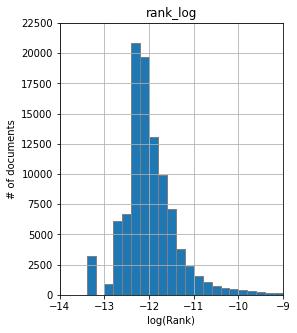

In [57]:
ax = data['rank_log'].hist(bins=25, edgecolor='grey', range=(-14, -9), figsize=(4,5))
ax.set_xlim([-14, -9])
ax.set_ylim([0, 22500])
plt.title('rank_log')
plt.xlabel('log(Rank)')
plt.ylabel('# of documents')
plt.savefig('rank-log-histogram.svg')

In [58]:
data['rank_expr'] = (
    np.log10(
        np.log10(data['rank'])
        +6.5
    )
    +0.163
)/0.820

In [59]:
data['rank_expr'].describe()

count    99896.000000
mean         0.326360
std          0.109427
min          0.001089
25%          0.276888
50%          0.319664
75%          0.381288
max          0.999404
Name: rank_expr, dtype: float64

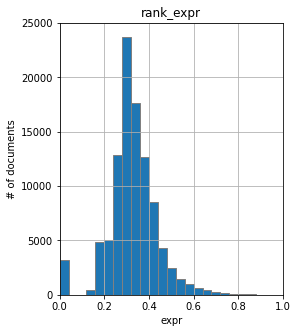

In [60]:
ax = data['rank_expr'].hist(bins=25, edgecolor='grey', range=(0, 1), figsize=(4,5))
ax.set_xlim([0, 1])
ax.set_ylim([0, 25000])
plt.title('rank_expr')
plt.xlabel('expr')
plt.ylabel('# of documents')
plt.savefig('rank-expr-histogram.svg')

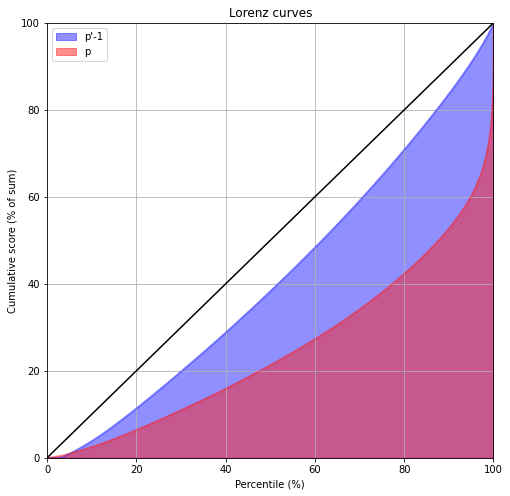

In [74]:
# [i/data['rank'].size for i in range(data['rank'].size)]
lorenz_df = data['rank'].to_frame()
lorenz_df['rank'] = np.sort(lorenz_df['rank'])

lorenz_df['rank_expr'] = np.sort(data['rank_expr'])

lorenz_df['rank_lorenz'] = lorenz_df['rank'].cumsum() / lorenz_df['rank'].sum() * 100
lorenz_df['rank_expr_lorenz'] = lorenz_df['rank_expr'].cumsum() / lorenz_df['rank_expr'].sum() * 100

lorenz_df['x'] = [100 * i/data['rank'].size for i in range(data['rank'].size)]

ax = lorenz_df.plot.area(x='x', y="rank_expr_lorenz", label="p'-1", figsize=(8,8), color="#2020ff80")
lorenz_df.plot.area(x='x', y="rank_lorenz", label="p", ax=ax, color="#ff202080")
ax.plot([0,100], [0,100], color='k')
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])
ax.xaxis.grid()
ax.yaxis.grid()
plt.title('Lorenz curves')
plt.xlabel('Percentile (%)')
plt.ylabel('Cumulative score (% of sum)')
plt.savefig('rank-lorenz.svg')

In [79]:
def get_gini(s):
    N = lorenz_df['x'].size
    B = 0
    for i1 in range(N-1):
        i2 = i1+1
        x1 = lorenz_df['x'][i1]/100
        x2 = lorenz_df['x'][i2]/100
        y1 = lorenz_df[s][i1]/100
        y2 = lorenz_df[s][i2]/100
        B += (x2-x1) * ((y1+y2)/2.0)
    A = 0.5 - B
    gini = A/(A+B)
    return gini

print(f"Gini of rank is {get_gini('rank_lorenz')}")
print(f"Gini of rank_expr is {get_gini('rank_expr_lorenz')}")


Gini of rank is 0.502400190601346
Gini of rank_expr is 0.17484823275423267
